# 用tf.keras.Model管理模型

In [1]:
import tensorflow as tf

## 1 用tf.keras.Model 管理Sequential模型
### 历史版本tf.keras.Model
- class tf.keras.models.Model
- class tf.compat.v1.keras.Model
- class tf.compat.v1.keras.models.Model
- class tf.compat.v2.keras.Model
- class tf.compat.v2.keras.models.Model
### 加载数据

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [5]:
print(x_train.shape, x_val.shape)

(50000, 28, 28) (10000, 28, 28)


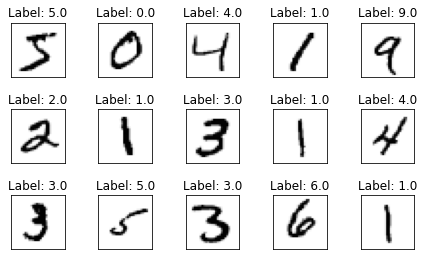

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.tight_layout() # 自动适配子图
    plt.imshow(x_train[i], cmap="Greys")  # 使用灰色显示像素灰度值
    plt.title("Label: {}".format(y_train[i]))   # 设置标签为子图标题
    plt.xticks([])  # 删除x轴标记
    plt.yticks([])  

### 模型构建

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Trainable params 可训练的参数
# Non-trainable params 不训练的参数

In [10]:
tf.keras.utils.plot_model(model, "mnist_mode.png")  #!pip install graphviz pydot

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


### 训练和评估模型

In [11]:
model.compile(optimizer="adam",
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.8922 - accuracy: 0.7467
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6212 - accuracy: 0.8387
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4943 - accuracy: 0.8699
Epoch 4/10
1563/1563 [==============================] - 1s 957us/step - loss: 0.4405 - accuracy: 0.8835
Epoch 5/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4096 - accuracy: 0.8930
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3906 - accuracy: 0.8974
Epoch 7/10
1563/1563 [==============================] - 1s 764us/step - loss: 0.3642 - accuracy: 0.9044
Epoch 8/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3596 - accuracy: 0.9061
Epoch 9/10
1563/1563 [==============================] - 1s 755us/step - loss: 0.3510 - accuracy: 0.9097
Epoch 10/10
1563/1563 [==============================] - 3s 2ms/step - loss:

In [13]:
model.evaluate(x_val, y_val)

313/313 [==============================] - 0s 613us/step - loss: 0.2698 - accuracy: 0.9446


[0.26979389786720276, 0.944599986076355]

### 模型保存
#### 保存为SavedModel格式的模型

In [14]:
model.save("mnist_model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mnist_model/assets


In [15]:
# 保存在mnist_model目录下：saved_model.pb 框架； variables为模型参数目录；assets 其他资源

In [16]:
m = tf.keras.models.load_model("mnist_model")

In [17]:
m.evaluate(x_val, y_val)

313/313 [==============================] - 0s 631us/step - loss: 0.2698 - accuracy: 0.9446


[0.26979389786720276, 0.944599986076355]

#### 保存为H5格式模型

In [18]:
m.save("mnist_model.h5")

In [19]:
m2 = tf.keras.models.load_model("mnist_model.h5")

In [20]:
m2.evaluate(x_val, y_val)

313/313 [==============================] - 0s 783us/step - loss: 0.2698 - accuracy: 0.9446


[0.26979389786720276, 0.944599986076355]

## 2 使用tf.keras管理functional api
###  使用tf.keras.input定义模型输入

In [21]:
tf.keras.backend.clear_session()  # 绘画重载

In [22]:
inputs = tf.keras.Input(shape=(28 ,28))
x = tf.keras.layers.Flatten(input_shape=(28, 28))(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

In [23]:
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [24]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer="adam",
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [26]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 2.6797 - accuracy: 0.7495
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6241 - accuracy: 0.8362
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4928 - accuracy: 0.8656
Epoch 4/10
1563/1563 [==============================] - 2s 2ms/step - loss: 0.4512 - accuracy: 0.8778
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.4134 - accuracy: 0.8892
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3966 - accuracy: 0.8925
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3766 - accuracy: 0.9002
Epoch 8/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3657 - accuracy: 0.9040
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3477 - accuracy: 0.9079
Epoch 10/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.340

In [27]:
model.evaluate(x_val, y_val)

313/313 [==============================] - 1s 2ms/step - loss: 0.2804 - accuracy: 0.9428


[0.28039491176605225, 0.942799985408783]

In [28]:
tf.keras.backend.clear_session()